<a href="https://colab.research.google.com/github/tharunalla/DeepLearning/blob/main/Lab04_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab04 - CNN Implementation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/marine_trash_dataset/test',
    target_size=(28, 28),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/marine_trash_dataset/valid',
    target_size=(28, 28),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Build CNN Model
model = Sequential([
    Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()


Found 285 images belonging to 6 classes.
Found 70 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,422 (548.52 KB)

 Trainable params: 140,422 (548.52 KB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 133s 15s/step - accuracy: 0.1672 - loss: 1.7998 - val_accuracy: 0.1714 - val_loss: 1.7902
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2314 - loss: 1.7629 - val_accuracy: 0.1571 - val_loss: 1.7902
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2875 - loss: 1.7512 - val_accuracy: 0.1714 - val_loss: 1.7842
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2694 - loss: 1.6749 - val_accuracy: 0.3857 - val_loss: 1.7866
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.3532 - loss: 1.6326 - val_accuracy: 0.2000 - val_loss: 1.7479
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3909 - loss: 1.4373 - val_accuracy: 0.3143 - val_loss: 1.7106
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4002 - loss: 1.3813 - val_accuracy: 0.2000 - val_loss: 1.7460
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4642 - loss: 1.3045 - val_accuracy: 0.3429 - val_loss: 1.6767
Epoch 

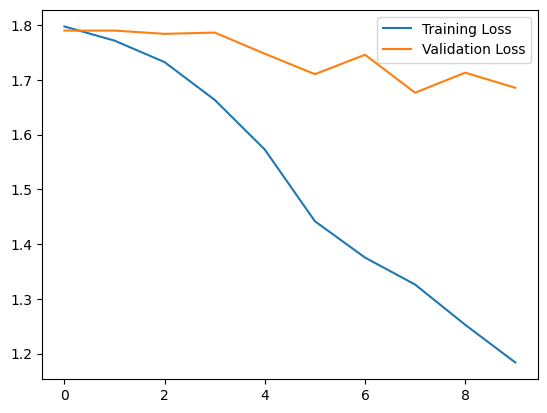

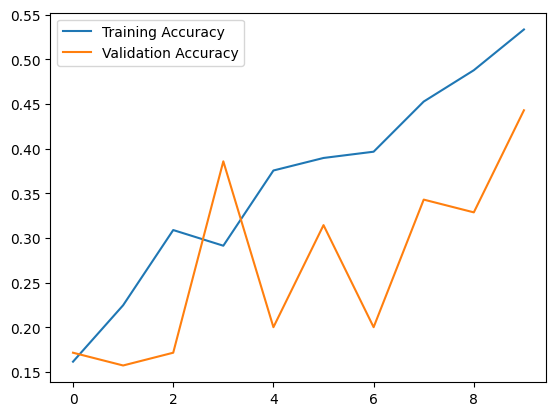

In [3]:
# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


## Evaluating Model Performance

In [4]:
# Evaluate model
score = model.evaluate(val_generator, verbose=1)
print(f'CNN Accuracy: {score[1]:.4f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.4558 - loss: 1.6769
CNN Accuracy: 0.4429


## Visualizing CNN Filters

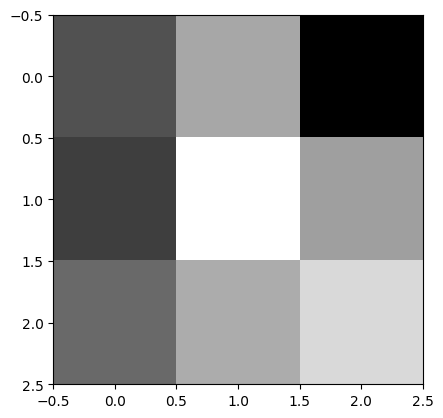

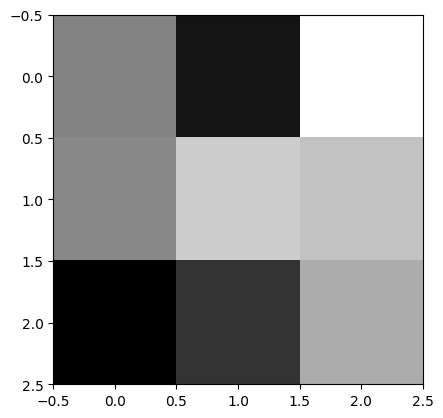

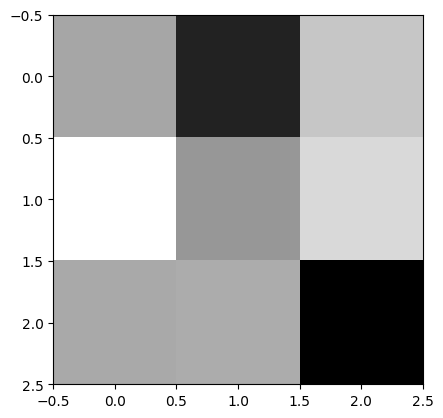

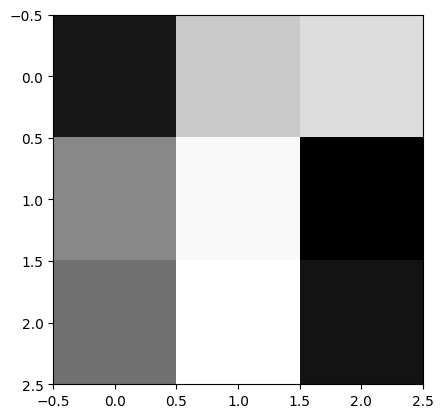

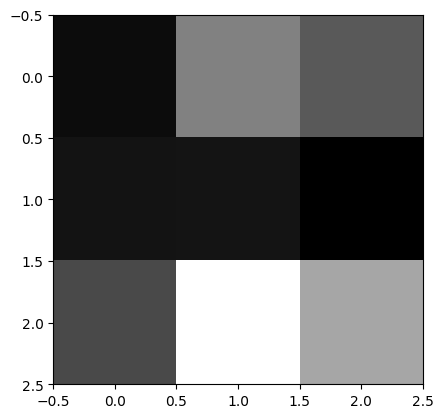

In [5]:
# Inspect first-layer filters
filters, biases = model.layers[0].get_weights()
for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.show()


## Applying Filter on Image

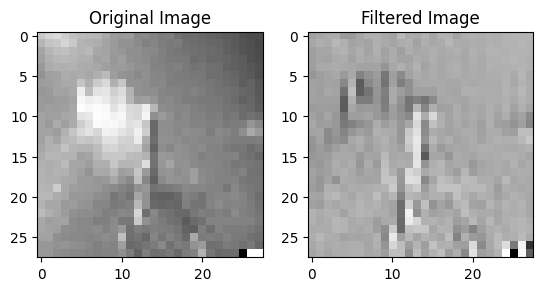

In [10]:
from scipy import signal

# Select an image from the dataset
sample_image, _ = next(train_generator)

sample_image = sample_image[0, :, :, 0]

# Apply first filter
filtered_image = signal.convolve2d(sample_image, filters[:, :, 0, 0], boundary='symm', mode='same')

# Show original and filtered image
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(sample_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.show()


## Fully Connected Network (MLP)

In [7]:
# Build fully connected network
fc_model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
fc_history = fc_model.fit(train_generator, validation_data=val_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.3109 - loss: 1.6744 - val_accuracy: 0.2000 - val_loss: 1.9156
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.3596 - loss: 1.5335 - val_accuracy: 0.1571 - val_loss: 1.8462
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4112 - loss: 1.4948 - val_accuracy: 0.1857 - val_loss: 1.9097
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.3925 - loss: 1.4270 - val_accuracy: 0.2286 - val_loss: 1.9117
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.4842 - loss: 1.3356 - val_accuracy: 0.1571 - val_loss: 1.9218
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4747 - loss: 1.3353 - val_accuracy: 0.2571 - val_loss: 1.9149
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5629 - loss: 1.3120 - val_accuracy: 0.2429 - val_loss: 1.9549
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4475 - loss: 1.3467 - val_accuracy: 0.3143 - val_loss: 1.9897
Epoch 9/

## Plot MLP Training & Validation Loss

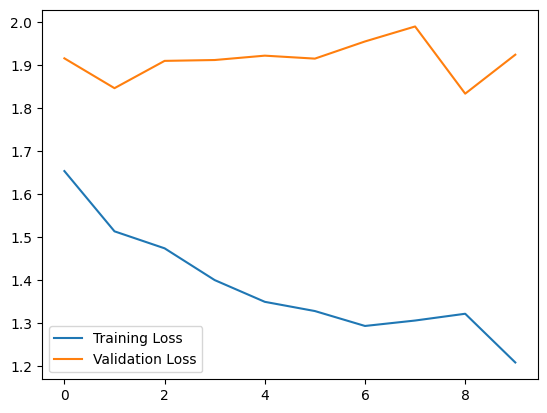

In [8]:
# Plot training and validation loss for fully connected network
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Evaluate Fully Connected Model

In [9]:
# Evaluate Fully Connected Model
fc_score = fc_model.evaluate(val_generator, verbose=1)
print(f'Fully Connected Network Accuracy: {fc_score[1]:.4f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - accuracy: 0.2041 - loss: 1.9478
Fully Connected Network Accuracy: 0.2286
